### Student Score Prediction

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [374]:
df = pd.read_csv('Exam_Score_Prediction.csv')
print("\nColumns:", df.columns)
print("\nShape:",df.shape)
print(f"\nData Types:\n{df.dtypes}")
print("\nChecking for missing values:")
df.isnull().sum()


Columns: Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

Shape: (20000, 13)

Data Types:
student_id            int64
age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object

Checking for missing values:


student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [375]:
df["course"].value_counts()

course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

In [376]:
df["exam_difficulty"].value_counts()

exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64

In [377]:
df["facility_rating"].value_counts()

facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

In [378]:
df["study_method"].value_counts()

study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

In [379]:
#1.Study_hours --> float, 
# 2.class_attendance --> float, 
# 3.course --> object, 
# 4.exam_difficulty --> object, 
# 5.sleep_hours --> float, 
# 6.facility_rating --> object,
# 7.sleep_quality --> object
# Targeted exam_score


### Data Label Encoding Using Map function

In [380]:
df["exam_difficulty_label"] = df["exam_difficulty"].map({"easy": 2, "moderate": 1, "hard": 0})
df["exam_difficulty_label"].value_counts()

exam_difficulty_label
1    9878
2    6141
0    3981
Name: count, dtype: int64

In [381]:
df["facility_rating_label"] = df["facility_rating"].map({"low": 2, "medium": 1, "high": 0})
df["facility_rating_label"].value_counts()

facility_rating_label
1    6760
2    6638
0    6602
Name: count, dtype: int64

In [382]:
df["sleep_quality_label"] = df["sleep_quality"].map({"poor": 0, "average": 1, "good": 2})
df["sleep_quality_label"].value_counts()

sleep_quality_label
1    6694
0    6687
2    6619
Name: count, dtype: int64

### Course Data One hot Coding

In [383]:
course_encoded = pd.get_dummies(df["course"], dtype=float)
print(course_encoded.head(10))


   b.com  b.sc  b.tech   ba  bba  bca  diploma
0    0.0   0.0     0.0  0.0  0.0  0.0      1.0
1    0.0   0.0     0.0  0.0  0.0  1.0      0.0
2    0.0   1.0     0.0  0.0  0.0  0.0      0.0
3    0.0   0.0     0.0  0.0  0.0  0.0      1.0
4    0.0   0.0     0.0  0.0  0.0  0.0      1.0
5    0.0   0.0     1.0  0.0  0.0  0.0      0.0
6    0.0   0.0     1.0  0.0  0.0  0.0      0.0
7    0.0   1.0     0.0  0.0  0.0  0.0      0.0
8    0.0   0.0     0.0  0.0  0.0  1.0      0.0
9    0.0   0.0     0.0  0.0  1.0  0.0      0.0


In [384]:
study_method_encoded = pd.get_dummies(df["study_method"], dtype=float)
print(study_method_encoded.head(10))

   coaching  group study  mixed  online videos  self-study
0       1.0          0.0    0.0            0.0         0.0
1       0.0          0.0    0.0            1.0         0.0
2       1.0          0.0    0.0            0.0         0.0
3       0.0          0.0    0.0            1.0         0.0
4       1.0          0.0    0.0            0.0         0.0
5       0.0          0.0    1.0            0.0         0.0
6       0.0          0.0    0.0            1.0         0.0
7       0.0          0.0    0.0            0.0         1.0
8       0.0          0.0    0.0            0.0         1.0
9       0.0          1.0    0.0            0.0         0.0


In [385]:
min_max_scaler = MinMaxScaler()
df[["study_hours", "class_attendance", "sleep_hours", "facility_rating_label", "exam_difficulty_label", "sleep_quality_label"]] = min_max_scaler.fit_transform(df[["study_hours", "class_attendance", "sleep_hours", "facility_rating_label", "exam_difficulty_label", "sleep_quality_label"]])
print(df[["study_hours", "class_attendance", "sleep_hours", "facility_rating_label", "exam_difficulty_label", "sleep_quality_label"]].head(10))

   study_hours  class_attendance  ...  exam_difficulty_label  sleep_quality_label
0     0.344828          0.889456  ...                    0.0                  0.0
1     0.420179          0.411565  ...                    0.5                  0.5
2     0.996169          0.615646  ...                    0.5                  0.0
3     0.075351          0.132653  ...                    0.5                  0.5
4     0.103448          0.527211  ...                    0.5                  0.0
5     0.434227          0.421769  ...                    0.5                  1.0
6     0.162197          0.482993  ...                    0.0                  0.5
7     0.689655          0.178571  ...                    0.5                  0.0
8     0.358876          0.874150  ...                    1.0                  0.0
9     0.854406          0.071429  ...                    0.5                  0.5

[10 rows x 6 columns]


### Model tanining 

In [386]:
le = LabelEncoder()
X = df[["study_hours", "class_attendance", "sleep_hours", "exam_difficulty_label", "facility_rating_label", "sleep_quality_label"]].join(course_encoded, how="left").join(study_method_encoded, how="left")
y = df["exam_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Model Eveulation

In [387]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
remse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {round(mae, 2)}")
print(f"Mean Squared Error: {round(mse, 2)}")
print(f"Root Mean Squared Error: {round(remse, 2)}")
print(f"R-squared Score: {round(r2, 2)}")

Mean Absolute Error: 7.86
Mean Squared Error: 95.46
Root Mean Squared Error: 9.77
R-squared Score: 0.73


### Data Visualiztaion

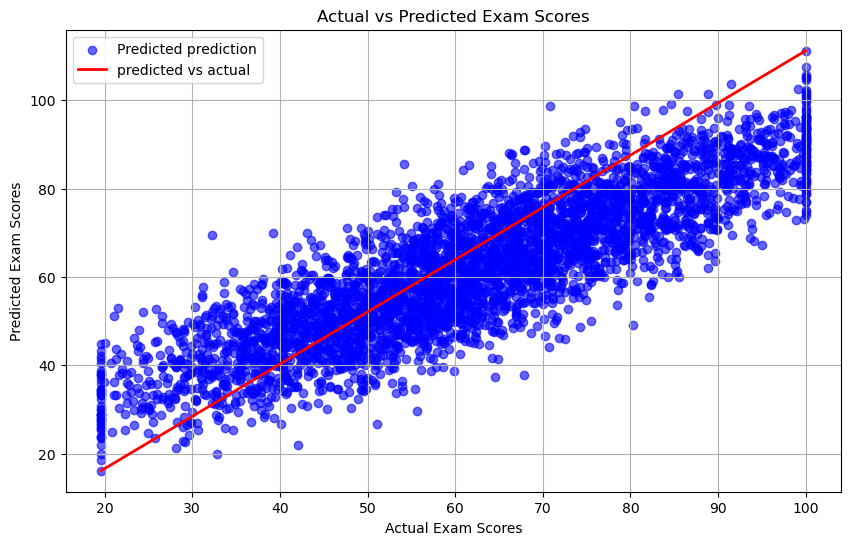

In [388]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted prediction')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linewidth=2, label='predicted vs actual')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.legend()
plt.grid()
plt.show()

### User Data to Exam Score Predicton

In [372]:
# Raw input values (unscaled)
new_hours = float(input("Enter study hours: "))
new_attendance = float(input("Enter class attendance percentage: "))
new_exam_difficulty = float(input("Enter exam difficulty (0 for hard, 1 for moderate, 2 for easy): "))
new_sleep_hours = float(input("Enter sleep hours: "))
new_facality_rating = float(input("Enter facility rating (0 for high, 1 for medium, 2 for low): "))
new_sleep_quality = float(input("Enter sleep quality (0 for poor, 1 for average, 2 for good): "))



# User to input one hot encoding Study Methods
new_study_method = input("Enter study method (self-study, online videos, coaching, group study, mixed): ")
if new_study_method == "self-study":
    new_study_method_encoded = [1, 0, 0, 0, 0]
elif new_study_method == "online videos":
    new_study_method_encoded = [0, 1, 0, 0, 0]
elif new_study_method == "coaching":
    new_study_method_encoded = [0, 0, 1, 0, 0]
elif new_study_method == "group study":
    new_study_method_encoded = [0, 0, 0, 1, 0]
elif new_study_method == "mixed":
    new_study_method_encoded = [0, 0, 0, 0, 1]
else:
    print("Invalid study method entered. Defaulting to self-study.")
    new_study_method_encoded = [1, 0, 0, 0, 0]


# User to input one hot encoding Course 
# FULL course encoding (7 course columns)
new_course = input("Enter course (btech, bba, bsc, bcom, mba, msc, mcom): ")
if new_course == "btech":
    new_course_encoded = [0, 0, 0, 1, 0, 0, 0]
elif new_course == "bba":
    new_course_encoded = [0, 0, 0, 0, 1, 0, 0]
elif new_course == "bsc":
    new_course_encoded = [0, 0, 0, 0, 0, 1, 0]
elif new_course == "bcom":
    new_course_encoded = [0, 0, 0, 0, 0, 0, 1]
elif new_course == "mba":
    new_course_encoded = [0, 1, 0, 0, 0, 0, 0]
elif new_course == "msc":
    new_course_encoded = [0, 0, 1, 0, 0, 0, 0]
elif new_course == "mcom":
    new_course_encoded = [1, 0, 0, 0, 0, 0, 0]
else:
    print("Invalid course entered. Defaulting to btech.")
    new_course_encoded = [0, 0, 0, 1, 0, 0, 0]




# Build numeric feature array in the SAME order used for training/scaling:
# [study_hours, class_attendance, sleep_hours, exam_difficulty_label, facility_rating_label, sleep_quality_label]
numeric = [new_hours, new_attendance, new_sleep_hours, new_exam_difficulty, new_facality_rating, new_sleep_quality]
# Scale numeric features using the same MinMaxScaler fitted earlier
# (min_max_scaler is defined previously in the notebook)
numeric_scaled = min_max_scaler.transform([numeric])[0]
# Combine scaled numeric features with course and study-method encodings
features = list(numeric_scaled) + new_course_encoded + new_study_method_encoded
# Ensure shape is correct and predict
new_prediction = model.predict([features])
print(f"Predicted exam score: {new_prediction[0]}")

Predicted exam score: 49.28380284253252


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
